In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
import sklearn
import  fuzzywuzzy.fuzz as fuzz
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("Training.csv")

In [3]:
df.drop_duplicates(inplace=True)
df.rename(columns={"mild_fever": "fever", "skin_rash": "rash","excessive_hunger":"hunger","throat_irritation":"throat pain","stomach_pain":1},inplace=True)
df.rename(columns={"mild_fever": "fever", "skin_rash": "rash","excessive_hunger":"hunger","throat_irritation":"throat pain","stomach_pain":1},inplace=True)

In [4]:
df.columns = df.columns.str.replace('_', ' ')


In [5]:
df.drop(np.nan, axis=1, inplace=True)
print(list(df.columns))

['itching', 'rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting  urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat pain', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal reg

In [6]:
len(df.columns)

132

In [7]:
df = df.append({'prognosis' : 'Heart attack' , 'chest pain':1,'nausea':1,'neck pain':1,'arm pain':1,'breathlessness':1} , ignore_index=True)

In [8]:
df= df.append({'prognosis' : 'Heart attack' , 'chest pain':1} , ignore_index=True)
df = df.append({'prognosis' : 'Common Cold' , 'cough':1,'headache':1} , ignore_index=True)

#Diabetes

df = df.append({'prognosis' : 'Diabetes ' , 'fatigue':1,'hunger':1,"sweating":1,'':1} , ignore_index=True)
df = df.append({'prognosis' : 'Diabetes ' , 'fatigue':1,'hunger':1,"sweating":1,'':1,"painlessness":1} , ignore_index=True)
df = df.append({'prognosis' : 'Diabetes ' ,'hunger':1,"sweating":1,'blurred and distorted vision':1,"painlessness":1} , ignore_index=True)
df = df.append({'prognosis' : 'Diabetes ' ,'hunger':1,'blurred and distorted vision':1,"painlessness":1} , ignore_index=True)
df = df.append({'prognosis' : 'Diabetes ' ,'fatigue':1,'hunger':1,'blurred and distorted vision':1} , ignore_index=True)


In [9]:
len(df.columns)

135

In [10]:
#Dentist

df= df.append({'prognosis' : 'dentist' , 'toothache':1,"cavity":1,"oral pain":1} , ignore_index=True)
df= df.append({'prognosis' : 'dentist' , 'toothache':1} , ignore_index=True)
df= df.append({'prognosis' : 'dentist' , 'toothache':1,"cavity":1} , ignore_index=True)
df= df.append({'prognosis' : 'dentist' , 'toothache':1,"oral pain":1} , ignore_index=True)
df= df.append({'prognosis' : 'dentist' ,"oral pain":1} , ignore_index=True)
df= df.append({'prognosis' : 'dentist' , 'toothache':1,"oral pain":1} , ignore_index=True)
df= df.append({'prognosis' : 'dentist' , 'toothache':1,"oral pain":1,"ulcers on tongue":1} , ignore_index=True)
df= df.append({'prognosis' : 'dentist' , 'toothache':1,"ulcers on tongue":1} , ignore_index=True)
df= df.append({'prognosis' : 'dentist' , 'toothache':1,"cavity":1,"oral pain":1,"ulcers on tongue":1} , ignore_index=True)
df= df.append({'prognosis' : 'dentist' , "cavity":1} , ignore_index=True)
df= df.append({'prognosis' : 'dentist' , "oral pain":1,"ulcers on tongue":1} , ignore_index=True)
df= df.append({'prognosis' : 'dentist' , "ulcers on tongue":1} , ignore_index=True)

In [11]:
##Neurologist
df= df.append({'prognosis' : 'neuroloigist' , 'fits':1,"paralaysis":1,"seizure":1,"mental confusion":1} , ignore_index=True)
df= df.append({'prognosis' : 'neuroloigist' , 'fits':1} , ignore_index=True)
df= df.append({'prognosis' : 'neuroloigist' , 'fits':1,"paralaysis":1} , ignore_index=True)
df= df.append({'prognosis' : 'neuroloigist' , 'fits':1,"paralaysis":1,"seizure":1} , ignore_index=True)
df= df.append({'prognosis' : 'neuroloigist' , 'fits':1,"paralaysis":1,"mental confusion":1} , ignore_index=True)
df= df.append({'prognosis' : 'neuroloigist' ,"paralaysis":1,"seizure":1,"mental confusion":1} , ignore_index=True)
df= df.append({'prognosis' : 'neuroloigist' ,"paralaysis":1} , ignore_index=True)

##Psycholoight

df= df.append({'prognosis' : 'psychologist' , 'depression':1,"anxiety":1,"sucidal thoughts":1,"mental confusion":1} , ignore_index=True)
df= df.append({'prognosis' : 'psychologist' , 'depression':1} , ignore_index=True)
df= df.append({'prognosis' : 'psychologist' ,"anxiety":1,"sucidal thoughts":1,"mental confusion":1} , ignore_index=True)
df= df.append({'prognosis' : 'psychologist' ,"sucidal thoughts":1} , ignore_index=True)
df= df.append({'prognosis' : 'psychologist' ,'depression':1,"sucidal thoughts":1} , ignore_index=True)
df= df.append({'prognosis' : 'psychologist' , 'depression':1,"sucidal thoughts":1,"mental confusion":1} , ignore_index=True)
df= df.append({'prognosis' : 'psychologist' , 'depression':1,"sucidal thoughts":1,"lack of concentration":1} , ignore_index=True)
df= df.append({'prognosis' : 'psychologist' , 'depression':1,"lack of concentration":1} , ignore_index=True)
df= df.append({'prognosis' : 'psychologist' , "sucidal thoughts":1,"mental confusion":1} , ignore_index=True)
df= df.append({'prognosis' : 'psychologist' ,'depression':1} , ignore_index=True)

##Fungal
df = df.append({'prognosis' : 'Fungal infection' , 'itching':1} , ignore_index=True)
df = df.append({'prognosis' : 'Fungal infection' , 'itching':1,"rashes":1,"bumps":1} , ignore_index=True)
df = df.append({'prognosis' : 'Fungal infection' , 'itching':1,"rashes":1} , ignore_index=True)

##Thyroid
df = df.append({'prognosis' : 'Hypothyroidism' , 'constipation':1,"weight gain":1,"tiredness":1,"fatigue":1} , ignore_index=True)
df = df.append({'prognosis' : 'Hypothyroidism' , 'constipation':1} , ignore_index=True)
df = df.append({'prognosis' : 'Hypothyroidism' , 'constipation':1,"weight gain":1} , ignore_index=True)
df = df.append({'prognosis' : 'Hypothyroidism' , 'constipation':1,"fatigue":1} , ignore_index=True)
df = df.append({'prognosis' : 'Hypothyroidism' , 'constipation':1,'stomach pain':1} , ignore_index=True)
df = df.append({'prognosis' : 'Hypothyroidism' , 'constipation':1,"vomiting":1} , ignore_index=True)
df = df.append({'prognosis' : 'Hypothyroidism' , 'stomach pain':1,"vomiting":1} , ignore_index=True)

In [12]:
len(df.columns)

147

In [13]:
##Heart Attack

df= df.append({'prognosis' : 'Heart attack' , "shoulder pain":1,'chest pain':1,'nausea':1,'neck pain':1,'arm pain':1,'breathlessness':1} , ignore_index=True)
df = df.append({'prognosis' : 'Heart attack' , 'chest pain':1,'neck pain':1,'arm pain':1,'breathlessness':1,"dizziness":1} , ignore_index=True)
df = df.append({'prognosis' : 'Heart attack' , 'chest pain':1,'arm pain':1,'breathlessness':1,"dizziness":1,'fast heart rate':1} , ignore_index=True)
df= df.append({'prognosis' : 'Heart attack' , 'chest pain':1,'arm pain':1,'breathlessness':1,"dizziness":1,'fast heart rate':1,"sweating":1} , ignore_index=True)
df = df.append({'prognosis' : 'Heart attack' , 'chest pain':1,"shoulder pain":1,'arm pain':1,'breathlessness':1,'fast heart rate':1,"sweating":1} , ignore_index=True)
df = df.append({'prognosis' : 'Heart attack' , 'chest pain':1,'arm pain':1,'breathlessness':1,"sweating":1} , ignore_index=True)
df = df.append({'prognosis' : 'Heart attack' , 'chest pain':1,'arm pain':1,'breathlessness':1,"sweating":1,"fatigue":1} , ignore_index=True)
df= df.append({'prognosis' : 'Heart attack' , 'chest pain':1,"shoulder pain":1} , ignore_index=True)
df= df.append({'prognosis' : 'Heart attack' , 'chest pain':1} , ignore_index=True)
df= df.append({'prognosis' : 'Heart attack' , "shoulder pain":1,'chest pain':1,"arm pain":1} , ignore_index=True)


### Common Cold Symptoms
df = df.append({'prognosis' : 'Common Cold' , 'fever':1,'cough':1,'head ache':1,'fatigue':1} , ignore_index=True)
df = df.append({'prognosis' : 'Common Cold' , 'fever':1,'cough':1,'runny nose':1,'chills':1,'head ache':1} , ignore_index=True)
df = df.append({'prognosis' : 'Common Cold' , 'fever':1,'cough':1,'head ache':1} , ignore_index=True)
df = df.append({'prognosis' : 'Common Cold' , 'fever':1,'cough':1,'fatigue':1,'chills':1,'head ache':1} , ignore_index=True)
df = df.append({'prognosis' : 'Common Cold' , 'cough':1,'fatigue':1,'runny nose':1,'chills':1,'head ache':1} , ignore_index=True)
df = df.append({'prognosis' : 'Common Cold' , 'fever':1,'cough':1,'runny nose':1,'mild fever':1,'head ache':1} , ignore_index=True)
df = df.append({'prognosis' : 'Common Cold' , 'fever':1,'cough':1,'runny nose':1,'mild fever':1} , ignore_index=True)
df = df.append({'prognosis' : 'Common Cold' , 'cough':1,'headache':1} , ignore_index=True)
df = df.append({'prognosis' : 'Common Cold' , 'fever':1,'cough':1,'headache':1} , ignore_index=True)
df = df.append({'prognosis' : 'Common Cold' , 'fever':1,'cough':1,'fatigue':1} , ignore_index=True)

###Opthalmologist
df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1,'headache':1} , ignore_index=True)
df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1,"less vision":1} , ignore_index=True)
df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1} , ignore_index=True)
df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1,"headache":1,"less vision":1,"blurred and distorted vision":1} , ignore_index=True)
df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1,"headache":1,"less vision":1,"red eye":1} , ignore_index=True)
df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1,"red eye":1} , ignore_index=True)
df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1} , ignore_index=True)
df = df.append({'prognosis' : 'ophthalmologist' , "red eye":1} , ignore_index=True)
df = df.append({'prognosis' : 'ophthalmologist' , "headache":1,"less vision":1} , ignore_index=True)
df = df.append({'prognosis' : 'ophthalmologist' , "red eye":1,"blurred and distorted vision":1} , ignore_index=True)

df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1,"watering from eyes":1} , ignore_index=True)
df = df.append({'prognosis' : 'ophthalmologist' , 'eye pain':1,"headache":1,"less vision":1,"red eye":1,"watering from eyes":1} , ignore_index=True)

##Pediatrician
df = df.append({'prognosis' : 'Pediatrician' , "child":1} , ignore_index=True)
df = df.append({'prognosis' : 'Pediatrician' , "child":1,"kid":1} , ignore_index=True)
df = df.append({'prognosis' : 'Pediatrician' , "child":1,"kid":1,"fever":1} , ignore_index=True)
df = df.append({'prognosis' : 'Pediatrician' , "baby":1} , ignore_index=True)
df = df.append({'prognosis' : 'Pediatrician' , "baby":1,"stomach pain":1} , ignore_index=True)
df = df.append({'prognosis' : 'Pediatrician' , "child":1,"stomach pain":1,"headache":1} , ignore_index=True)
df = df.append({'prognosis' : 'Pediatrician' , "child":1,"stomach pain":1,"headache":1,"fever":1} , ignore_index=True)
df = df.append({'prognosis' : 'Pediatrician' , "child":1,"fever":1} , ignore_index=True)
df = df.append({'prognosis' : 'Pediatrician' , "child":1,"stomach pain":1,"headache":1,"fever":1,"cough":1} , ignore_index=True)
df = df.append({'prognosis' : 'Pediatrician' , "baby":1,"stomach pain":1,"headache":1,"fever":1,"cough":1} , ignore_index=True)
df = df.append({'prognosis' : 'Pediatrician' , "kid":1,"stomach pain":1,"headache":1,"fever":1,"cough":1} , ignore_index=True)

df = df.append({'prognosis' : 'Urinary tract infection' , "yellow urine":1,"polyuria":1,"foul smell of urine":1,"continuous feel of urine":1} , ignore_index=True)
df = df.append({'prognosis' : 'Urinary tract infection' , "foul smell of urine":1} , ignore_index=True)
df = df.append({'prognosis' : 'Urinary tract infection' ,"polyuria":1} , ignore_index=True)
df = df.append({'prognosis' : 'Urinary tract infection' , "yellow urine":1,"polyuria":1,"continuous feel of urine":1} , ignore_index=True)
df = df.append({'prognosis' : 'Urinary tract infection' , "continuous feel of urine":1} , ignore_index=True)
df = df.append({'prognosis' : 'Urinary tract infection' ,"polyuria":1,"foul smell of urine":1,"continuous feel of urine":1} , ignore_index=True)


df = df.append({'prognosis' : '(vertigo) Paroymsal  Positional Vertigo' ,"ear pain":1,"throat pain":1} , ignore_index=True)
df = df.append({'prognosis' : '(vertigo) Paroymsal  Positional Vertigo' ,"ear pain":1} , ignore_index=True)
df = df.append({'prognosis' : '(vertigo) Paroymsal  Positional Vertigo' ,"throat pain":1} , ignore_index=True)

In [14]:
df.tail()

,itching,rash,nodal skin eruptions,continuous sneezing,shivering,chills,joint pain,acidity,ulcers on tongue,muscle wasting,...,shoulder pain,head ache,mild fever,eye pain,less vision,red eye,child,kid,baby,ear pain
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
print(list(df.columns))

['itching', 'rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting  urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat pain', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal reg

In [16]:
df.fillna(0,inplace=True)

In [17]:
df.loc[df.prognosis == "Arthritis", 'joint pain'] = 1
df.loc[df.prognosis == "Osteoarthristis", 'joint pain'] = 1

In [18]:
df.loc[df.prognosis == "Heart attack", 'chest pain']

222    1.0
223    1.0
224    1.0
225    1.0
226    0.0
304    1.0
305    1.0
351    1.0
352    1.0
353    1.0
354    1.0
355    1.0
356    1.0
357    1.0
358    1.0
359    1.0
360    1.0
Name: chest pain, dtype: float64

In [19]:
df["prognosis"].value_counts()

Common Cold                                20
Heart attack                               17
Hypothyroidism                             15
Diabetes                                   14
dentist                                    12
ophthalmologist                            12
Urinary tract infection                    11
Pediatrician                               11
Dengue                                     10
(vertigo) Paroymsal  Positional Vertigo    10
Migraine                                   10
Hepatitis D                                10
psychologist                               10
Chicken pox                                10
Hyperthyroidism                             9
Hypoglycemia                                9
Pneumonia                                   9
Typhoid                                     9
Hepatitis E                                 9
hepatitis A                                 9
Tuberculosis                                9
Jaundice                          

In [20]:
df["prognosis"].value_counts()

Common Cold                                20
Heart attack                               17
Hypothyroidism                             15
Diabetes                                   14
dentist                                    12
ophthalmologist                            12
Urinary tract infection                    11
Pediatrician                               11
Dengue                                     10
(vertigo) Paroymsal  Positional Vertigo    10
Migraine                                   10
Hepatitis D                                10
psychologist                               10
Chicken pox                                10
Hyperthyroidism                             9
Hypoglycemia                                9
Pneumonia                                   9
Typhoid                                     9
Hepatitis E                                 9
hepatitis A                                 9
Tuberculosis                                9
Jaundice                          

In [21]:
col=df.columns
#col


In [22]:
raw_col=list(col)
len(raw_col)

157

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Columns: 157 entries, itching to ear pain
dtypes: float64(156), object(1)
memory usage: 494.4+ KB


In [24]:
display(df.head())
display(df.tail())

,itching,rash,nodal skin eruptions,continuous sneezing,shivering,chills,joint pain,acidity,ulcers on tongue,muscle wasting,...,shoulder pain,head ache,mild fever,eye pain,less vision,red eye,child,kid,baby,ear pain
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,itching,rash,nodal skin eruptions,continuous sneezing,shivering,chills,joint pain,acidity,ulcers on tongue,muscle wasting,...,shoulder pain,head ache,mild fever,eye pain,less vision,red eye,child,kid,baby,ear pain
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Transforming Prognosis to Doctor Type

In [25]:
d=list(df["prognosis"].unique())
print(d)
len(d)

['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis', 'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ', 'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine', 'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia', 'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia', 'Osteoarthristis', 'Arthritis', '(vertigo) Paroymsal  Positional Vertigo', 'Acne', 'Urinary tract infection', 'Psoriasis', 'Impetigo', 'dentist', 'neuroloigist', 'psychologist', 'ophthalmologist', 'Pediatrician']


46

In [26]:
c=[2,1,3,3,1,
   3,1,11,3,5,
   6,1,7,8,3,1,
   1,1,1,3,3,3
   ,3,3,3,5,1,5,
   1,6,1,4,4,4,
   7,7,9,2,10,2,2,13,8,12,14,15]
len(c)

46

In [27]:
mapper={
    'general':1,
    'dermatoligist':2,
    'gastroentolist':3,
    'endocrinologist':4,
    'pulmonologist':5,
    'cardiologist':6,
    'orthopedist':7,
    'neurologist':8,
    'ENT':9,
    'urologist':10,
    "diabetics dep":11,
    "psychologist":12,
    "dentist":13,
    14:"ophthalmologist",
15:"pediatrician"}

invmap={1: 'general',
 2: 'dermatoligist',
 3: 'gastroentolist',
 4: 'endocrinologist',
 5: 'pulmonologist',
 6: 'cardiologist',
 7: 'orthopedist',
 8: 'neurologist',
 9: 'ENT',
 10: 'urologist',
 11: 'diabetics dep',
 12:"psychologist",
 13:"dentist",
14:"ophthalmologist",
15:"pediatrician"}

In [28]:
for i in range(46):
    print("{} for {} for {}".format(d[i],c[i],invmap[c[i]]))

Fungal infection for 2 for dermatoligist
Allergy for 1 for general
GERD for 3 for gastroentolist
Chronic cholestasis for 3 for gastroentolist
Drug Reaction for 1 for general
Peptic ulcer diseae for 3 for gastroentolist
AIDS for 1 for general
Diabetes  for 11 for diabetics dep
Gastroenteritis for 3 for gastroentolist
Bronchial Asthma for 5 for pulmonologist
Hypertension  for 6 for cardiologist
Migraine for 1 for general
Cervical spondylosis for 7 for orthopedist
Paralysis (brain hemorrhage) for 8 for neurologist
Jaundice for 3 for gastroentolist
Malaria for 1 for general
Chicken pox for 1 for general
Dengue for 1 for general
Typhoid for 1 for general
hepatitis A for 3 for gastroentolist
Hepatitis B for 3 for gastroentolist
Hepatitis C for 3 for gastroentolist
Hepatitis D for 3 for gastroentolist
Hepatitis E for 3 for gastroentolist
Alcoholic hepatitis for 3 for gastroentolist
Tuberculosis for 5 for pulmonologist
Common Cold for 1 for general
Pneumonia for 5 for pulmonologist
Dimorphic h

In [29]:
df[df["prognosis"]=="Arthritis"]["joint pain"]

268    1.0
269    1.0
270    1.0
271    1.0
272    1.0
273    1.0
Name: joint pain, dtype: float64

In [30]:
for i in range (15):
    print("{} times {} ".format(c.count(i),i))

0 times 0 
11 times 1 
4 times 2 
11 times 3 
3 times 4 
3 times 5 
2 times 6 
3 times 7 
2 times 8 
1 times 9 
1 times 10 
1 times 11 
1 times 12 
1 times 13 
1 times 14 


In [31]:
trans={key: c[d.index(key)] for key in d}    #Working

In [32]:
c[d.index("Acne")]  ##Checking

2

In [33]:
trans # Mapping Done

{'Fungal infection': 2,
 'Allergy': 1,
 'GERD': 3,
 'Chronic cholestasis': 3,
 'Drug Reaction': 1,
 'Peptic ulcer diseae': 3,
 'AIDS': 1,
 'Diabetes ': 11,
 'Gastroenteritis': 3,
 'Bronchial Asthma': 5,
 'Hypertension ': 6,
 'Migraine': 1,
 'Cervical spondylosis': 7,
 'Paralysis (brain hemorrhage)': 8,
 'Jaundice': 3,
 'Malaria': 1,
 'Chicken pox': 1,
 'Dengue': 1,
 'Typhoid': 1,
 'hepatitis A': 3,
 'Hepatitis B': 3,
 'Hepatitis C': 3,
 'Hepatitis D': 3,
 'Hepatitis E': 3,
 'Alcoholic hepatitis': 3,
 'Tuberculosis': 5,
 'Common Cold': 1,
 'Pneumonia': 5,
 'Dimorphic hemmorhoids(piles)': 1,
 'Heart attack': 6,
 'Varicose veins': 1,
 'Hypothyroidism': 4,
 'Hyperthyroidism': 4,
 'Hypoglycemia': 4,
 'Osteoarthristis': 7,
 'Arthritis': 7,
 '(vertigo) Paroymsal  Positional Vertigo': 9,
 'Acne': 2,
 'Urinary tract infection': 10,
 'Psoriasis': 2,
 'Impetigo': 2,
 'dentist': 13,
 'neuroloigist': 8,
 'psychologist': 12,
 'ophthalmologist': 14,
 'Pediatrician': 15}

In [34]:
df["prognosis"]=df["prognosis"].map(trans)

In [35]:
df["prognosis"]

0       2
1       2
2       2
3       2
4       2
       ..
398    10
399    10
400     9
401     9
402     9
Name: prognosis, Length: 403, dtype: int64

In [36]:
df["prognosis"].value_counts()

1     97
3     88
4     33
2     26
5     25
6     23
7     19
11    14
14    12
13    12
8     12
15    11
10    11
12    10
9     10
Name: prognosis, dtype: int64

In [37]:
invmap

{1: 'general',
 2: 'dermatoligist',
 3: 'gastroentolist',
 4: 'endocrinologist',
 5: 'pulmonologist',
 6: 'cardiologist',
 7: 'orthopedist',
 8: 'neurologist',
 9: 'ENT',
 10: 'urologist',
 11: 'diabetics dep',
 12: 'psychologist',
 13: 'dentist',
 14: 'ophthalmologist',
 15: 'pediatrician'}

In [38]:
df.loc[df.prognosis == 5, 'wheezing'] = 1
df.loc[df.prognosis == 11, 'frequent urination'] = 1


In [39]:
df.loc[df.prognosis==7,"joint pain"].value_counts()

1.0    13
0.0     6
Name: joint pain, dtype: int64

In [40]:
##Deleting Urologist,Virologist,ENT,pediatrc

In [41]:
print(list(df.columns))

['itching', 'rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting  urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat pain', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal reg

In [42]:
df.fillna(0,inplace=True)

In [43]:
df.tail()

,itching,rash,nodal skin eruptions,continuous sneezing,shivering,chills,joint pain,acidity,ulcers on tongue,muscle wasting,...,mild fever,eye pain,less vision,red eye,child,kid,baby,ear pain,wheezing,frequent urination
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df.rename(columns={"prognosis":"department"},inplace=True)
df[["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"]]=pd.get_dummies(data=df["department"])

In [45]:
df.to_csv('cleaned_data.csv') 

In [46]:
print(list(df.columns))

['itching', 'rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting  urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat pain', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal reg

In [47]:
len(df.columns)

174

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=["department","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"],axis=1),df[["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"]] , test_size=0.20, random_state=42)

In [49]:
len(X_train.columns)

158

In [50]:
print(list(X_train.columns))

['itching', 'rash', 'nodal skin eruptions', 'continuous sneezing', 'shivering', 'chills', 'joint pain', 'acidity', 'ulcers on tongue', 'muscle wasting', 'vomiting', 'burning micturition', 'spotting  urination', 'fatigue', 'weight gain', 'anxiety', 'cold hands and feets', 'mood swings', 'weight loss', 'restlessness', 'lethargy', 'patches in throat', 'irregular sugar level', 'cough', 'high fever', 'sunken eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish skin', 'dark urine', 'nausea', 'loss of appetite', 'pain behind the eyes', 'back pain', 'constipation', 'abdominal pain', 'diarrhoea', 'fever', 'yellow urine', 'yellowing of eyes', 'acute liver failure', 'fluid overload', 'swelling of stomach', 'swelled lymph nodes', 'malaise', 'blurred and distorted vision', 'phlegm', 'throat pain', 'redness of eyes', 'sinus pressure', 'runny nose', 'congestion', 'chest pain', 'weakness in limbs', 'fast heart rate', 'pain during bowel movements', 'pain in anal reg

In [54]:
classifier = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [55]:
classifier.score(X_test, y_test)

0.9259259259259259

In [56]:
pred=classifier.predict(X_test)

In [57]:
confusion_matrix(
    y_test.values.argmax(axis=1), pred.argmax(axis=1))

NameError: name 'confusion_matrix' is not defined

In [58]:
model1=Sequential()
model1.add(Dense(100, kernel_initializer= "glorot_uniform", activation = "relu", input_dim = 158))
model1.add(Dense(15, activation = "softmax"))
model1.compile(optimizer = "Adam", loss ="categorical_crossentropy", metrics = ["accuracy"])
history=model1.fit(X_train, y_train, epochs = 15,verbose=1,validation_data=[X_test,y_test])

Train on 322 samples, validate on 81 samples
Epoch 1/15
322/322 [==============================] - 1s 2ms/sample - loss: 2.6258 - accuracy: 0.1366 - val_loss: 2.4528 - val_accuracy: 0.4074
Epoch 2/15
322/322 [==============================] - 0s 112us/sample - loss: 2.3387 - accuracy: 0.4348 - val_loss: 2.2038 - val_accuracy: 0.5309
Epoch 3/15
322/322 [==============================] - 0s 112us/sample - loss: 2.0656 - accuracy: 0.5559 - val_loss: 1.9591 - val_accuracy: 0.5926
Epoch 4/15
322/322 [==============================] - 0s 112us/sample - loss: 1.8093 - accuracy: 0.6335 - val_loss: 1.7375 - val_accuracy: 0.6667
Epoch 5/15
322/322 [==============================] - 0s 137us/sample - loss: 1.5803 - accuracy: 0.7019 - val_loss: 1.5504 - val_accuracy: 0.6914
Epoch 6/15
322/322 [==============================] - 0s 121us/sample - loss: 1.3853 - accuracy: 0.7422 - val_loss: 1.3919 - val_accuracy: 0.7037
Epoch 7/15
322/322 [==============================] - 0s 124us/sample - loss: 1.2

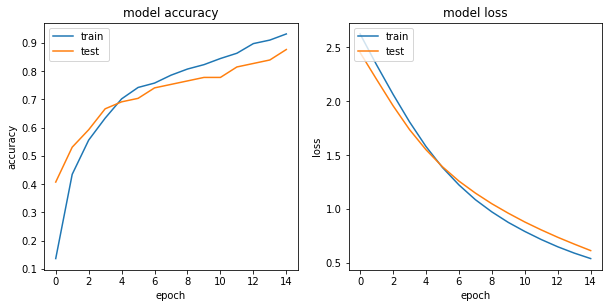

In [59]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
model2 = Sequential([
    tf.keras.layers.Dense(128, kernel_initializer= "GlorotNormal", activation = "relu", input_dim = 158),
    tf.keras.layers.Dense(32, activation = "relu"),
    tf.keras.layers.Dense(15, activation='softmax')
])                       ###Same Model Different type
model2.compile(optimizer = "Adam", loss ="categorical_crossentropy", metrics = ["accuracy"])
history=model2.fit(X_train, y_train, epochs = 10,verbose=1,validation_data=[X_test,y_test])

Train on 322 samples, validate on 81 samples
Epoch 1/10
322/322 [==============================] - 1s 2ms/sample - loss: 2.6465 - accuracy: 0.1025 - val_loss: 2.5409 - val_accuracy: 0.2346
Epoch 2/10
322/322 [==============================] - 0s 134us/sample - loss: 2.4029 - accuracy: 0.3447 - val_loss: 2.3093 - val_accuracy: 0.3827
Epoch 3/10
322/322 [==============================] - 0s 121us/sample - loss: 2.1241 - accuracy: 0.4099 - val_loss: 2.0253 - val_accuracy: 0.3827
Epoch 4/10
322/322 [==============================] - 0s 106us/sample - loss: 1.8272 - accuracy: 0.4503 - val_loss: 1.7542 - val_accuracy: 0.4568
Epoch 5/10
322/322 [==============================] - 0s 121us/sample - loss: 1.5523 - accuracy: 0.5497 - val_loss: 1.5267 - val_accuracy: 0.5802
Epoch 6/10
322/322 [==============================] - 0s 155us/sample - loss: 1.3067 - accuracy: 0.6615 - val_loss: 1.3300 - val_accuracy: 0.7037
Epoch 7/10
322/322 [==============================] - 0s 127us/sample - loss: 1.1

In [61]:
model3 = Sequential([
    tf.keras.layers.Dense(128, kernel_initializer= "GlorotNormal", activation = "relu", input_dim = 158),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(15, activation='softmax')
])                       ###Same Model Different type
model3.compile(optimizer = "Adam", loss ="categorical_crossentropy", metrics = ["accuracy"])
history=model3.fit(X_train, y_train, epochs = 10,verbose=1,validation_data=[X_test,y_test])

Train on 322 samples, validate on 81 samples
Epoch 1/10
322/322 [==============================] - 1s 2ms/sample - loss: 2.5981 - accuracy: 0.2174 - val_loss: 2.4141 - val_accuracy: 0.5185
Epoch 2/10
322/322 [==============================] - 0s 115us/sample - loss: 2.2704 - accuracy: 0.4224 - val_loss: 2.1112 - val_accuracy: 0.5062
Epoch 3/10
322/322 [==============================] - 0s 121us/sample - loss: 1.9403 - accuracy: 0.4379 - val_loss: 1.8030 - val_accuracy: 0.5062
Epoch 4/10
322/322 [==============================] - 0s 112us/sample - loss: 1.6352 - accuracy: 0.4534 - val_loss: 1.5472 - val_accuracy: 0.5309
Epoch 5/10
322/322 [==============================] - 0s 115us/sample - loss: 1.3863 - accuracy: 0.5342 - val_loss: 1.3559 - val_accuracy: 0.5926
Epoch 6/10
322/322 [==============================] - 0s 121us/sample - loss: 1.1698 - accuracy: 0.6863 - val_loss: 1.1934 - val_accuracy: 0.7037
Epoch 7/10
322/322 [==============================] - 0s 118us/sample - loss: 0.9

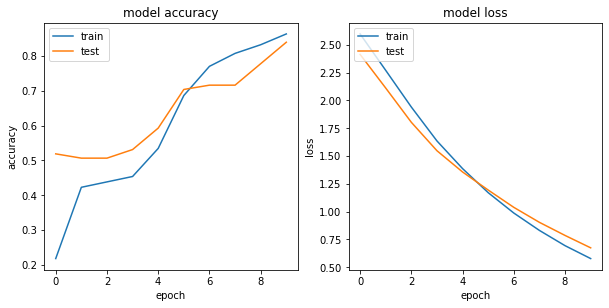

In [62]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [63]:
import pickle
filename = 'model4rf.sav'
filename2 = 'model5rf.sav'

In [64]:
model1.save("my_model1",save_format="tf")
model2.save("my_model2",save_format="tf")
model3.save("my_model3",save_format="tf")
pickle.dump(classifier, open(filename, 'wb'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_model1\assets
INFO:tensorflow:Assets written to: my_model2\assets
INFO:tensorflow:Assets written to: my_model3\assets


## Stop HEre


In [ ]:
input_sym=input("Enter your Symptoms seperated by comma ,If they are two words use (_)")
inp_sym=input_sym.split(sep=",")
print("input_Symptoms parsed: ",inp_sym)
raw_col=list(df.columns)
symp_dict={key: 0 for key in raw_col}
for i in inp_sym:
        if i in raw_col:
            symp_dict[i]=1
        else:
            for z in raw_col:
                fuzz_score=fuzz.token_set_ratio(i,z)
                if fuzz_score>70:
                    symp_dict[z]=1
    ##TESTING:
for key,values in symp_dict.items():
        if values==1:
            print(key)

In [ ]:
df_run=pd.DataFrame(symp_dict,index=[1])
pred=model1.predict(df_run.drop(labels=["department","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16"],axis=1).head(1))

In [ ]:
display("Prediction Raw Values : ",pred)  ##Testing

In [ ]:
value=list(pred.argmax(axis=1))
value

In [ ]:
 display("prediction Argmax : ",value[0])  ##Testing    
print("You can book doctors under {} section".format(invmap[value[0]+1]))

In [ ]:
def doctorguide():
    input_sym=input("Enter your Symptoms seperated by comma ,If they are two words use (_)")
    inp_sym=input_sym.split(sep=",")
    print("input_Symptoms parsed: ",inp_sym)
    raw_col=list(df.columns)
    symp_dict={key: 0 for key in raw_col}
    for i in inp_sym:
        if i in raw_col:
            symp_dict[i]=1
        else:
            for z in raw_col:
                fuzz_score=fuzz.token_set_ratio(i,z)
                if fuzz_score>70:
                    symp_dict[z]=1
    ##TESTING:
    for key,values in symp_dict.items():
        if values==1:
            print(key)
    df_run=pd.DataFrame(symp_dict,index=[1])
    pred=model1.predict(df_run.drop(labels=["department","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16"],axis=1).head(1))
    display("Prediction Raw Values : ",pred)  ##Testing
    value=list(pred.argmax(axis=1))
    display("prediction Argmax : ",value[0])  ##Testing    
    print("You can book doctors under {} section".format(invmap[value[0]+1]))

In [ ]:
doctorguide()

In [ ]:
def doctorguider_rf():
    input_sym=input("Enter your Symptoms seperated by comma ,If they are two words use (_)")
    inp_sym=input_sym.split(sep=",")
    print("input_Symptoms parsed: ",inp_sym)
    raw_col=list(df.columns)
    symp_dict={key: 0 for key in raw_col}
    for i in inp_sym:
        if i in raw_col:
            symp_dict[i]=1
        else:
            for z in raw_col:
                fuzz_score=fuzz.token_set_ratio(i,z)
                if fuzz_score>70:
                    symp_dict[z]=1
    ##TESTING:
    for key,values in symp_dict.items():
        if values==1:
            print(key)
    df_run=pd.DataFrame(symp_dict,index=[1])
    pred=classifier.predict(df_run.drop(labels=["department","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16"],axis=1).head(1))
    display("Prediction Raw Values : ",pred)  ##Testing
    value=list(pred.argmax(axis=1))
    print("value:",value)
    display("prediction Argmax : ",value[0])  ##Testing    
    print("You can book doctors under {} section".format(invmap[value[0]+1]))

In [ ]:
doctorguider_rf()

In [ ]:
def doctorguide_lm():
    input_sym=input("Enter your Symptoms seperated by comma ,If they are two words use (_)")
    inp_sym=input_sym.split(sep=",")
    print("input_Symptoms parsed: ",inp_sym)
    raw_col=list(df.columns)
    symp_dict={key: 0 for key in raw_col}
    for i in inp_sym:
        if i in raw_col:
            symp_dict[i]=1
        else:
            for z in raw_col:
                fuzz_score=fuzz.token_set_ratio(i,z)
                if fuzz_score>70:
                    symp_dict[z]=1
    ##TESTING:
    for key,values in symp_dict.items():
        if values==1:
            print(key)
    df_run=pd.DataFrame(symp_dict,index=[1])
    ##model=tf.keras.models.load_model("my_modeltf")
    pred=model.predict(df_run.drop(labels=["department","1","2","3","4","5","6","7","8","9","10","11","12","13","14"],axis=1).head(1))
    display("Prediction Raw Values : ",pred)  ##Testing
    value=list(pred.argmax(axis=1))
    display("prediction Argmax : ",value[0])  ##Testing    
    print("You can book doctors under {} section".format(invmap[value[0]+1]))

In [ ]:
#common cold=
"""
thyroid:constipation,tiredness ,weight_gain ##Done
joint_pain #done
chest_pain #done
'joint_pain', 'muscle_weekness', 'tiredness'
joint_pain,shoulder_pain
##update jointpain=1 for orth
mental_confusion ##done
fits,paralaysis,seizure --neuroloigist  ##Done
loss_of_smell,throat_pain,ear_pain,sinus
toothache,cavity --dentist   ##Add many rows  ##Done
"""

In [ ]:
#df.rename(columns={"mild_fever": "fever", "skin_rash": "rash","excessive_hunger":"hunger"})  #done
           

In [ ]:
#['fever', 'headache', 'body_pain'] :malaria  #i have to do